# ANN for Function Estimation
### Amir, 2022
### 

In [1]:
# ANN version
# Regression Example With wine dataset ...
import pandas as pd
from pandas import read_csv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Conv1D 
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
# from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
import numpy as np
import matplotlib.pyplot as plt  


2022-10-14 14:16:07.960885: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-14 14:16:08.143756: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/melodic/lib
2022-10-14 14:16:08.143776: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-14 14:16:08.182877: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-14 14:16:08.938544: W

In [2]:

# load dataset
dataframe = read_csv("wine_r2_t_noheader.csv" , header=None)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:11]
Y = dataset[:,11]

print(X.shape)
X = X.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)


(1599, 11)
(1599, 11, 1)


In [21]:
Y.shape

(1599,)

In [3]:
print(dataset.shape)
# dataframe.describe()
# dataframe.info()
dataframe.head()


(1599, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(16, activation="relu", input_shape=(11,1)) )
    model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Flatten())
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model


In [5]:
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=400, batch_size=5, verbose=1)
kfold = KFold(n_splits=5)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))
print(results)

/tmp/ipykernel_4633/383927505.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=baseline_model, epochs=400, batch_size=5, verbose=1)
2022-10-14 14:16:10.842334: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-10-14 14:16:10.842365: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mpheng-Lenovo-ideapad-520-15IKB): /proc/driver/nvidia/version does not exist
2022-10-14 14:16:10.842614: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild Ten

Epoch 1/400
256/256 [==============================] - 1s 1ms/step - loss: 6.4621
Epoch 2/400
256/256 [==============================] - 0s 1ms/step - loss: 0.6352
Epoch 3/400
256/256 [==============================] - 0s 1ms/step - loss: 0.5917
Epoch 4/400
256/256 [==============================] - 0s 1ms/step - loss: 0.5742
Epoch 5/400
256/256 [==============================] - 0s 2ms/step - loss: 0.5623
Epoch 6/400
256/256 [==============================] - 0s 2ms/step - loss: 0.5680
Epoch 7/400
256/256 [==============================] - 0s 2ms/step - loss: 0.5450
Epoch 8/400
256/256 [==============================] - 0s 2ms/step - loss: 0.5416
Epoch 9/400
256/256 [==============================] - 0s 2ms/step - loss: 0.5233
Epoch 10/400
256/256 [==============================] - 0s 1ms/step - loss: 0.5321
Epoch 11/400
256/256 [==============================] - 0s 1ms/step - loss: 0.5220
Epoch 12/400
256/256 [==============================] - 0s 2ms/step - loss: 0.5143
Epoch 13/400


256/256 [==============================] - 0s 2ms/step - loss: 0.4627
Epoch 100/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4562
Epoch 101/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4585
Epoch 102/400
256/256 [==============================] - 0s 2ms/step - loss: 0.4634
Epoch 103/400
256/256 [==============================] - 0s 2ms/step - loss: 0.4694
Epoch 104/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4532
Epoch 105/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4610
Epoch 106/400
256/256 [==============================] - 0s 2ms/step - loss: 0.4543
Epoch 107/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4525
Epoch 108/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4624
Epoch 109/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4601
Epoch 110/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4548
Epoch 

256/256 [==============================] - 0s 787us/step - loss: 0.4353
Epoch 196/400
256/256 [==============================] - 0s 812us/step - loss: 0.4363
Epoch 197/400
256/256 [==============================] - 0s 821us/step - loss: 0.4370
Epoch 198/400
256/256 [==============================] - 0s 824us/step - loss: 0.4374
Epoch 199/400
256/256 [==============================] - 0s 811us/step - loss: 0.4425
Epoch 200/400
256/256 [==============================] - 0s 810us/step - loss: 0.4383
Epoch 201/400
256/256 [==============================] - 0s 811us/step - loss: 0.4398
Epoch 202/400
256/256 [==============================] - 0s 809us/step - loss: 0.4348
Epoch 203/400
256/256 [==============================] - 0s 815us/step - loss: 0.4436
Epoch 204/400
256/256 [==============================] - 0s 800us/step - loss: 0.4366
Epoch 205/400
256/256 [==============================] - 0s 804us/step - loss: 0.4357
Epoch 206/400
256/256 [==============================] - 0s 802us/st

256/256 [==============================] - 0s 959us/step - loss: 0.4303
Epoch 292/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4283
Epoch 293/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4243
Epoch 294/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4274
Epoch 295/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4275
Epoch 296/400
256/256 [==============================] - 0s 924us/step - loss: 0.4259
Epoch 297/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4228
Epoch 298/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4358
Epoch 299/400
256/256 [==============================] - 0s 916us/step - loss: 0.4300
Epoch 300/400
256/256 [==============================] - 0s 989us/step - loss: 0.4269
Epoch 301/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4232
Epoch 302/400
256/256 [==============================] - 0s 1ms/step - loss: 0.421

256/256 [==============================] - 0s 1ms/step - loss: 0.4238
Epoch 389/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4189
Epoch 390/400
256/256 [==============================] - 0s 2ms/step - loss: 0.4164
Epoch 391/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4185
Epoch 392/400
256/256 [==============================] - 0s 2ms/step - loss: 0.4211
Epoch 393/400
256/256 [==============================] - 0s 2ms/step - loss: 0.4219
Epoch 394/400
256/256 [==============================] - 0s 2ms/step - loss: 0.4236
Epoch 395/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4249
Epoch 396/400
256/256 [==============================] - 0s 2ms/step - loss: 0.4222
Epoch 397/400
256/256 [==============================] - 0s 2ms/step - loss: 0.4227
Epoch 398/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4199
Epoch 399/400
256/256 [==============================] - 0s 2ms/step - loss: 0.4259
Epoch 

Epoch 86/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4529
Epoch 87/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4599
Epoch 88/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4524
Epoch 89/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4492
Epoch 90/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4524
Epoch 91/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4458
Epoch 92/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4450
Epoch 93/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4502
Epoch 94/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4496
Epoch 95/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4548
Epoch 96/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4448
Epoch 97/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4497
Epoc

256/256 [==============================] - 0s 825us/step - loss: 0.4347
Epoch 183/400
256/256 [==============================] - 0s 865us/step - loss: 0.4424
Epoch 184/400
256/256 [==============================] - 0s 876us/step - loss: 0.4418
Epoch 185/400
256/256 [==============================] - 0s 886us/step - loss: 0.4395
Epoch 186/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4366
Epoch 187/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4429
Epoch 188/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4304
Epoch 189/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4339
Epoch 190/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4412
Epoch 191/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4382
Epoch 192/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4376
Epoch 193/400
256/256 [==============================] - 0s 974us/step - loss: 0.4

256/256 [==============================] - 0s 2ms/step - loss: 0.4294
Epoch 280/400
256/256 [==============================] - 0s 2ms/step - loss: 0.4338
Epoch 281/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4349
Epoch 282/400
256/256 [==============================] - 0s 2ms/step - loss: 0.4257
Epoch 283/400
256/256 [==============================] - 0s 2ms/step - loss: 0.4304
Epoch 284/400
256/256 [==============================] - 0s 2ms/step - loss: 0.4323
Epoch 285/400
256/256 [==============================] - 0s 2ms/step - loss: 0.4331
Epoch 286/400
256/256 [==============================] - 0s 2ms/step - loss: 0.4271
Epoch 287/400
256/256 [==============================] - 0s 2ms/step - loss: 0.4289
Epoch 288/400
256/256 [==============================] - 0s 2ms/step - loss: 0.4305
Epoch 289/400
256/256 [==============================] - 0s 2ms/step - loss: 0.4271
Epoch 290/400
256/256 [==============================] - 1s 2ms/step - loss: 0.4310
Epoch 

256/256 [==============================] - 0s 1ms/step - loss: 0.4258
Epoch 377/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4184
Epoch 378/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4245
Epoch 379/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4230
Epoch 380/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4236
Epoch 381/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4235
Epoch 382/400
256/256 [==============================] - 0s 995us/step - loss: 0.4213
Epoch 383/400
256/256 [==============================] - 0s 823us/step - loss: 0.4226
Epoch 384/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4265
Epoch 385/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4230
Epoch 386/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4213
Epoch 387/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4228
Ep

256/256 [==============================] - 0s 1ms/step - loss: 0.4567
Epoch 74/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4578
Epoch 75/400
256/256 [==============================] - 0s 905us/step - loss: 0.4524
Epoch 76/400
256/256 [==============================] - 0s 977us/step - loss: 0.4515
Epoch 77/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4556
Epoch 78/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4503
Epoch 79/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4535
Epoch 80/400
256/256 [==============================] - 0s 991us/step - loss: 0.4495
Epoch 81/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4661
Epoch 82/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4546
Epoch 83/400
256/256 [==============================] - 0s 955us/step - loss: 0.4554
Epoch 84/400
256/256 [==============================] - 0s 931us/step - loss: 0.4551
Epoch 8

256/256 [==============================] - 0s 1ms/step - loss: 0.4437
Epoch 170/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4468
Epoch 171/400
256/256 [==============================] - 0s 939us/step - loss: 0.4484
Epoch 172/400
256/256 [==============================] - 0s 932us/step - loss: 0.4448
Epoch 173/400
256/256 [==============================] - 0s 935us/step - loss: 0.4484
Epoch 174/400
256/256 [==============================] - 0s 935us/step - loss: 0.4462
Epoch 175/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4479
Epoch 176/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4400
Epoch 177/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4384
Epoch 178/400
256/256 [==============================] - 0s 819us/step - loss: 0.4470
Epoch 179/400
256/256 [==============================] - 0s 824us/step - loss: 0.4509
Epoch 180/400
256/256 [==============================] - 0s 811us/step - loss:

256/256 [==============================] - 0s 822us/step - loss: 0.4376
Epoch 266/400
256/256 [==============================] - 0s 807us/step - loss: 0.4384
Epoch 267/400
256/256 [==============================] - 0s 813us/step - loss: 0.4425
Epoch 268/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4454
Epoch 269/400
256/256 [==============================] - 0s 972us/step - loss: 0.4399
Epoch 270/400
256/256 [==============================] - 0s 997us/step - loss: 0.4399
Epoch 271/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4368
Epoch 272/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4363
Epoch 273/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4398
Epoch 274/400
256/256 [==============================] - 0s 892us/step - loss: 0.4380
Epoch 275/400
256/256 [==============================] - 0s 816us/step - loss: 0.4400
Epoch 276/400
256/256 [==============================] - 0s 830us/step - los

256/256 [==============================] - 0s 803us/step - loss: 0.4390
Epoch 362/400
256/256 [==============================] - 0s 939us/step - loss: 0.4311
Epoch 363/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4406
Epoch 364/400
256/256 [==============================] - 0s 830us/step - loss: 0.4326
Epoch 365/400
256/256 [==============================] - 0s 900us/step - loss: 0.4344
Epoch 366/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4341
Epoch 367/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4296
Epoch 368/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4332
Epoch 369/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4333
Epoch 370/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4344
Epoch 371/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4340
Epoch 372/400
256/256 [==============================] - 0s 1ms/step - loss: 0.430

Epoch 57/400
256/256 [==============================] - 0s 831us/step - loss: 0.4630
Epoch 58/400
256/256 [==============================] - 0s 831us/step - loss: 0.4661
Epoch 59/400
256/256 [==============================] - 0s 809us/step - loss: 0.4722
Epoch 60/400
256/256 [==============================] - 0s 801us/step - loss: 0.4612
Epoch 61/400
256/256 [==============================] - 0s 810us/step - loss: 0.4687
Epoch 62/400
256/256 [==============================] - 0s 813us/step - loss: 0.4642
Epoch 63/400
256/256 [==============================] - 0s 816us/step - loss: 0.4627
Epoch 64/400
256/256 [==============================] - 0s 825us/step - loss: 0.4553
Epoch 65/400
256/256 [==============================] - 0s 820us/step - loss: 0.4585
Epoch 66/400
256/256 [==============================] - 0s 834us/step - loss: 0.4698
Epoch 67/400
256/256 [==============================] - 0s 809us/step - loss: 0.4590
Epoch 68/400
256/256 [==============================] - 0s 804us/

256/256 [==============================] - 0s 866us/step - loss: 0.4507
Epoch 153/400
256/256 [==============================] - 0s 893us/step - loss: 0.4386
Epoch 154/400
256/256 [==============================] - 0s 888us/step - loss: 0.4386
Epoch 155/400
256/256 [==============================] - 0s 874us/step - loss: 0.4439
Epoch 156/400
256/256 [==============================] - 0s 877us/step - loss: 0.4414
Epoch 157/400
256/256 [==============================] - 0s 890us/step - loss: 0.4373
Epoch 158/400
256/256 [==============================] - 0s 890us/step - loss: 0.4306
Epoch 159/400
256/256 [==============================] - 0s 883us/step - loss: 0.4381
Epoch 160/400
256/256 [==============================] - 0s 883us/step - loss: 0.4339
Epoch 161/400
256/256 [==============================] - 0s 890us/step - loss: 0.4368
Epoch 162/400
256/256 [==============================] - 0s 880us/step - loss: 0.4392
Epoch 163/400
256/256 [==============================] - 0s 946us/st

256/256 [==============================] - 0s 895us/step - loss: 0.4207
Epoch 248/400
256/256 [==============================] - 0s 859us/step - loss: 0.4137
Epoch 249/400
256/256 [==============================] - 0s 859us/step - loss: 0.4243
Epoch 250/400
256/256 [==============================] - 0s 886us/step - loss: 0.4194
Epoch 251/400
256/256 [==============================] - 0s 900us/step - loss: 0.4245
Epoch 252/400
256/256 [==============================] - 0s 885us/step - loss: 0.4235
Epoch 253/400
256/256 [==============================] - 0s 892us/step - loss: 0.4250
Epoch 254/400
256/256 [==============================] - 0s 878us/step - loss: 0.4216
Epoch 255/400
256/256 [==============================] - 0s 878us/step - loss: 0.4201
Epoch 256/400
256/256 [==============================] - 0s 865us/step - loss: 0.4227
Epoch 257/400
256/256 [==============================] - 0s 871us/step - loss: 0.4198
Epoch 258/400
256/256 [==============================] - 0s 881us/st

256/256 [==============================] - 0s 899us/step - loss: 0.4145
Epoch 343/400
256/256 [==============================] - 0s 883us/step - loss: 0.4137
Epoch 344/400
256/256 [==============================] - 0s 865us/step - loss: 0.4158
Epoch 345/400
256/256 [==============================] - 0s 864us/step - loss: 0.4197
Epoch 346/400
256/256 [==============================] - 0s 881us/step - loss: 0.4116
Epoch 347/400
256/256 [==============================] - 0s 883us/step - loss: 0.4141
Epoch 348/400
256/256 [==============================] - 0s 884us/step - loss: 0.4259
Epoch 349/400
256/256 [==============================] - 0s 876us/step - loss: 0.4143
Epoch 350/400
256/256 [==============================] - 0s 865us/step - loss: 0.4252
Epoch 351/400
256/256 [==============================] - 0s 867us/step - loss: 0.4134
Epoch 352/400
256/256 [==============================] - 0s 877us/step - loss: 0.4201
Epoch 353/400
256/256 [==============================] - 0s 853us/st

256/256 [==============================] - 0s 1ms/step - loss: 0.4621
Epoch 38/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4687
Epoch 39/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4655
Epoch 40/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4709
Epoch 41/400
256/256 [==============================] - 0s 907us/step - loss: 0.4627
Epoch 42/400
256/256 [==============================] - 0s 876us/step - loss: 0.4739
Epoch 43/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4645
Epoch 44/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4617
Epoch 45/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4677
Epoch 46/400
256/256 [==============================] - 0s 2ms/step - loss: 0.4582
Epoch 47/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4593
Epoch 48/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4581
Epoch 49/400


256/256 [==============================] - 0s 929us/step - loss: 0.4622
Epoch 135/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4454
Epoch 136/400
256/256 [==============================] - 0s 2ms/step - loss: 0.4571
Epoch 137/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4562
Epoch 138/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4445
Epoch 139/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4465
Epoch 140/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4626
Epoch 141/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4533
Epoch 142/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4530
Epoch 143/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4447
Epoch 144/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4538
Epoch 145/400
256/256 [==============================] - 0s 935us/step - loss: 0.4516
Ep

256/256 [==============================] - 0s 1ms/step - loss: 0.4425
Epoch 232/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4449
Epoch 233/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4505
Epoch 234/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4409
Epoch 235/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4413
Epoch 236/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4476
Epoch 237/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4418
Epoch 238/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4464
Epoch 239/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4390
Epoch 240/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4401
Epoch 241/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4417
Epoch 242/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4509
Epoch 

256/256 [==============================] - 0s 1ms/step - loss: 0.4482
Epoch 328/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4427
Epoch 329/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4417
Epoch 330/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4488
Epoch 331/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4383
Epoch 332/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4439
Epoch 333/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4455
Epoch 334/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4438
Epoch 335/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4439
Epoch 336/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4482
Epoch 337/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4464
Epoch 338/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4378
Epoch 

In [6]:
# 2nd test ....
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [7]:
estimator.fit(X_train, Y_train)
prediction = estimator.predict(X)

train_error =  np.abs(Y - prediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)
print('\nTraining results:\nmean=',mean_error,'\nmin=',min_error,'\nmax=',max_error,'\nstd=',std_error)

Epoch 1/400
256/256 [==============================] - 1s 1ms/step - loss: 5.9178
Epoch 2/400
256/256 [==============================] - 0s 1ms/step - loss: 0.6361
Epoch 3/400
256/256 [==============================] - 0s 1ms/step - loss: 0.5839
Epoch 4/400
256/256 [==============================] - 0s 1ms/step - loss: 0.5782
Epoch 5/400
256/256 [==============================] - 0s 1ms/step - loss: 0.5579
Epoch 6/400
256/256 [==============================] - 0s 1ms/step - loss: 0.5413
Epoch 7/400
256/256 [==============================] - 0s 1ms/step - loss: 0.5340
Epoch 8/400
256/256 [==============================] - 0s 1ms/step - loss: 0.5218
Epoch 9/400
256/256 [==============================] - 0s 1ms/step - loss: 0.5280
Epoch 10/400
256/256 [==============================] - 0s 1ms/step - loss: 0.5141
Epoch 11/400
256/256 [==============================] - 0s 1ms/step - loss: 0.5162
Epoch 12/400
256/256 [==============================] - 0s 1ms/step - loss: 0.5044
Epoch 13/400


256/256 [==============================] - 0s 1ms/step - loss: 0.4580
Epoch 100/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4702
Epoch 101/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4687
Epoch 102/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4602
Epoch 103/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4606
Epoch 104/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4730
Epoch 105/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4648
Epoch 106/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4557
Epoch 107/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4725
Epoch 108/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4667
Epoch 109/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4711
Epoch 110/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4648
Epoch 

256/256 [==============================] - 0s 1ms/step - loss: 0.4374
Epoch 197/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4378
Epoch 198/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4455
Epoch 199/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4420
Epoch 200/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4412
Epoch 201/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4562
Epoch 202/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4471
Epoch 203/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4447
Epoch 204/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4466
Epoch 205/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4462
Epoch 206/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4435
Epoch 207/400
256/256 [==============================] - 0s 2ms/step - loss: 0.4478
Epoch 

256/256 [==============================] - 0s 1ms/step - loss: 0.4349
Epoch 294/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4381
Epoch 295/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4339
Epoch 296/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4379
Epoch 297/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4275
Epoch 298/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4285
Epoch 299/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4362
Epoch 300/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4319
Epoch 301/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4320
Epoch 302/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4381
Epoch 303/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4337
Epoch 304/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4285
Epoch 

256/256 [==============================] - 0s 1ms/step - loss: 0.4276
Epoch 390/400
256/256 [==============================] - 0s 839us/step - loss: 0.4303
Epoch 391/400
256/256 [==============================] - 0s 773us/step - loss: 0.4242
Epoch 392/400
256/256 [==============================] - 0s 802us/step - loss: 0.4275
Epoch 393/400
256/256 [==============================] - 0s 854us/step - loss: 0.4332
Epoch 394/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4315
Epoch 395/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4263
Epoch 396/400
256/256 [==============================] - 0s 887us/step - loss: 0.4335
Epoch 397/400
256/256 [==============================] - 0s 802us/step - loss: 0.4329
Epoch 398/400
256/256 [==============================] - 0s 810us/step - loss: 0.4304
Epoch 399/400
256/256 [==============================] - 0s 814us/step - loss: 0.4258
Epoch 400/400
320/320 [==============================] - 0s 616us/step

Tr

In [8]:
print(prediction)


[5.1851783 5.3803177 5.394405  ... 6.0866346 5.609702  6.159821 ]


In [9]:
print(Y)


[5. 5. 5. ... 6. 5. 6.]


In [10]:
df = pd.DataFrame({'Actual': Y, 'Predicted': prediction})
df1 = df.tail(25)
print(df1)

      Actual  Predicted
1574     6.0   5.695601
1575     6.0   6.234795
1576     6.0   6.367726
1577     6.0   5.889097
1578     6.0   5.837664
1579     5.0   5.878686
1580     6.0   6.348060
1581     5.0   5.878686
1582     5.0   5.668380
1583     5.0   5.486426
1584     7.0   6.539649
1585     6.0   6.437639
1586     6.0   6.505625
1587     6.0   5.782758
1588     6.0   6.330223
1589     5.0   5.060812
1590     6.0   6.233882
1591     6.0   5.551661
1592     6.0   6.086635
1593     6.0   5.641281
1594     5.0   5.513926
1595     6.0   6.060013
1596     6.0   6.086635
1597     5.0   5.609702
1598     6.0   6.159821


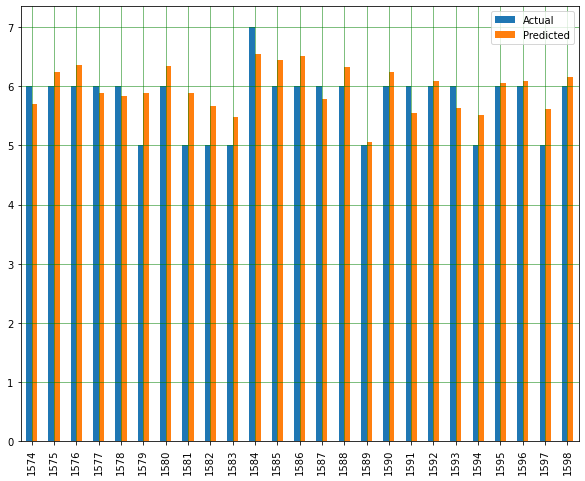

In [11]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

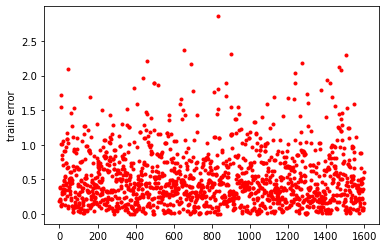

In [12]:
plt.plot(train_error,'r.')
plt.ylabel('train error')
plt.show()

In [13]:
estimator.fit(X_train, Y_train)
prediction = estimator.predict(X_test)

test_error =  np.abs(Y_test - prediction)
mean_error = np.mean(test_error)
min_error = np.min(test_error)
max_error = np.max(test_error)
std_error = np.std(test_error)
print('\nTesting results:\nmean=',mean_error,'\nmin=',min_error,'\nmax=',max_error,'\nstd=',std_error)

Epoch 1/400
256/256 [==============================] - 0s 784us/step - loss: 7.4532
Epoch 2/400
256/256 [==============================] - 0s 855us/step - loss: 0.7375
Epoch 3/400
256/256 [==============================] - 0s 875us/step - loss: 0.6234
Epoch 4/400
256/256 [==============================] - 0s 870us/step - loss: 0.5982
Epoch 5/400
256/256 [==============================] - 0s 1ms/step - loss: 0.5845
Epoch 6/400
256/256 [==============================] - 0s 2ms/step - loss: 0.5634
Epoch 7/400
256/256 [==============================] - 0s 2ms/step - loss: 0.5623
Epoch 8/400
256/256 [==============================] - 0s 2ms/step - loss: 0.5530
Epoch 9/400
256/256 [==============================] - 0s 2ms/step - loss: 0.5461
Epoch 10/400
256/256 [==============================] - 0s 2ms/step - loss: 0.5348
Epoch 11/400
256/256 [==============================] - 0s 2ms/step - loss: 0.5397
Epoch 12/400
256/256 [==============================] - 0s 1ms/step - loss: 0.5291
Epoch

256/256 [==============================] - 0s 1ms/step - loss: 0.4616
Epoch 99/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4698
Epoch 100/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4655
Epoch 101/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4677
Epoch 102/400
256/256 [==============================] - 0s 890us/step - loss: 0.4804
Epoch 103/400
256/256 [==============================] - 0s 817us/step - loss: 0.4694
Epoch 104/400
256/256 [==============================] - 0s 815us/step - loss: 0.4745
Epoch 105/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4701
Epoch 106/400
256/256 [==============================] - 0s 937us/step - loss: 0.4558
Epoch 107/400
256/256 [==============================] - 0s 794us/step - loss: 0.4582
Epoch 108/400
256/256 [==============================] - 0s 799us/step - loss: 0.4609
Epoch 109/400
256/256 [==============================] - 0s 801us/step - loss: 

Epoch 195/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4477
Epoch 196/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4574
Epoch 197/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4529
Epoch 198/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4540
Epoch 199/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4571
Epoch 200/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4487
Epoch 201/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4516
Epoch 202/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4575
Epoch 203/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4523
Epoch 204/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4528
Epoch 205/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4510
Epoch 206/400
256/256 [==============================] - 0s 1ms/step - loss:

256/256 [==============================] - 0s 779us/step - loss: 0.4404
Epoch 293/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4430
Epoch 294/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4435
Epoch 295/400
256/256 [==============================] - 0s 830us/step - loss: 0.4400
Epoch 296/400
256/256 [==============================] - 0s 867us/step - loss: 0.4376
Epoch 297/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4503
Epoch 298/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4373
Epoch 299/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4421
Epoch 300/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4404
Epoch 301/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4385
Epoch 302/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4447
Epoch 303/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4435


256/256 [==============================] - 0s 1ms/step - loss: 0.4369
Epoch 390/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4413
Epoch 391/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4378
Epoch 392/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4310
Epoch 393/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4371
Epoch 394/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4327
Epoch 395/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4372
Epoch 396/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4337
Epoch 397/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4366
Epoch 398/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4316
Epoch 399/400
256/256 [==============================] - 0s 1ms/step - loss: 0.4378
Epoch 400/400
64/64 [==============================] - 0s 749us/step

Testing results:
mea

In [14]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': prediction})
df1 = df.tail(25)
print(df1)

     Actual  Predicted
295     6.0   5.533926
296     6.0   5.396454
297     5.0   5.156503
298     6.0   5.024899
299     5.0   5.142339
300     6.0   5.562873
301     5.0   4.925944
302     6.0   5.171732
303     6.0   5.591762
304     6.0   5.994804
305     6.0   5.593212
306     5.0   5.185147
307     5.0   4.885374
308     6.0   5.572680
309     5.0   5.266222
310     5.0   5.732602
311     6.0   5.747396
312     5.0   5.405154
313     5.0   5.091276
314     5.0   4.936960
315     6.0   6.311820
316     4.0   5.567614
317     5.0   6.056970
318     4.0   4.876967
319     6.0   6.035738


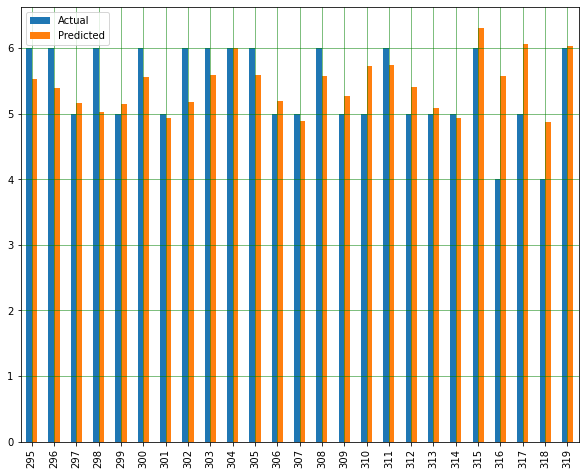

In [15]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

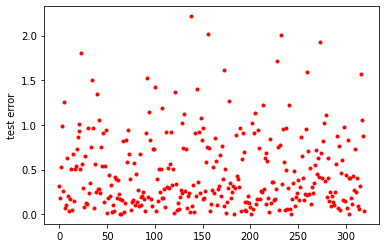

In [16]:
plt.plot(test_error,'r.')
plt.ylabel('test error')
plt.show()

In [17]:
test_error2 =  np.abs(Y_test - np.round(prediction) )
mean_error2 = np.mean(test_error2)
min_error2 = np.min(test_error2)
max_error2 = np.max(test_error2)
std_error2 = np.std(test_error2)
print('\nTesting results:\nmean=',mean_error2,'\nmin=',min_error2,'\nmax=',max_error2,'\nstd=',std_error2 )


Testing results:
mean= 0.415625 
min= 0.0 
max= 2.0 
std= 0.5582390700900467


     Actual  Predicted
295     6.0        6.0
296     6.0        5.0
297     5.0        5.0
298     6.0        5.0
299     5.0        5.0
300     6.0        6.0
301     5.0        5.0
302     6.0        5.0
303     6.0        6.0
304     6.0        6.0
305     6.0        6.0
306     5.0        5.0
307     5.0        5.0
308     6.0        6.0
309     5.0        5.0
310     5.0        6.0
311     6.0        6.0
312     5.0        5.0
313     5.0        5.0
314     5.0        5.0
315     6.0        6.0
316     4.0        6.0
317     5.0        6.0
318     4.0        5.0
319     6.0        6.0


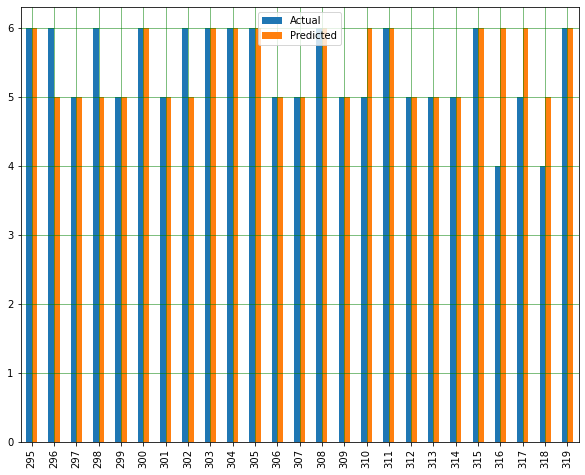

In [18]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': np.round(prediction)})
df1 = df.tail(25)
print(df1)

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

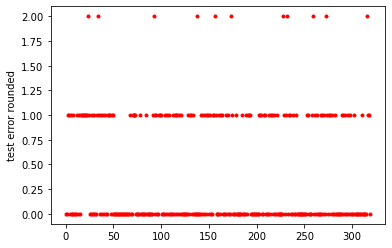

In [19]:
plt.plot(test_error2,'r.')
plt.ylabel('test error rounded')
plt.show()